In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

sns.set_style("whitegrid")

DATA_PATH = "../../data/raw/kinematic_equation_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at path: {DATA_PATH}")

In [43]:
df = pd.read_csv(DATA_PATH)
print(f"Dataset loaded: {df.shape[0]} rows x {df.shape[1]} columns")
df.head()

Dataset loaded: 3000 rows x 3 columns


,Acceleration_ms2,Time_s,Displacement_m
0,4.058131,6.759760,87.500452
1,9.531786,7.987146,306.398351
2,7.453942,2.579632,26.251919
3,6.187256,6.286254,127.027015
4,1.982177,5.760285,28.941541


In [44]:

missing = df.isnull().sum()

if missing.sum() == 0:
    print("No missing values found")
else:
    print("Missing values:\n", missing)
    
expected_columns = {'Acceleration_ms2', 'Time_s', 'Displacement_m'}

if not expected_columns.issubset(df.columns):
    raise ValueError(f"Missing expected columns. Found: {df.columns.tolist()}")

No missing values found


In [45]:
df = df[df['Time_s'] != 0]

df['estimated_u'] = (df['Displacement_m'] - 0.5 * df['Acceleration_ms2'] * df['Time_s']**2) / df['Time_s']
df['computed_displacement'] = df['estimated_u'] * df['Time_s'] + 0.5 * df['Acceleration_ms2'] * df['Time_s']**2
df['abs_disp_error'] = np.abs(df['computed_displacement'] - df['Displacement_m'])

max_disp_error = df['abs_disp_error'].max()
mean_disp_error = df['abs_disp_error'].mean()

print(f"Max displacement error: {max_disp_error:.6e}")
print(f"Mean displacement error: {mean_disp_error:.6e}")

if max_disp_error < 1e-6:
    print("✅ Displacement values are physically consistent with the kinematic model (with estimated initial velocity).")
else:
    print("⚠️ Displacement values still deviate beyond acceptable tolerance.")


Max displacement error: 3.552714e-15
Mean displacement error: 2.039775e-17
✅ Displacement values are physically consistent with the kinematic model (with estimated initial velocity).


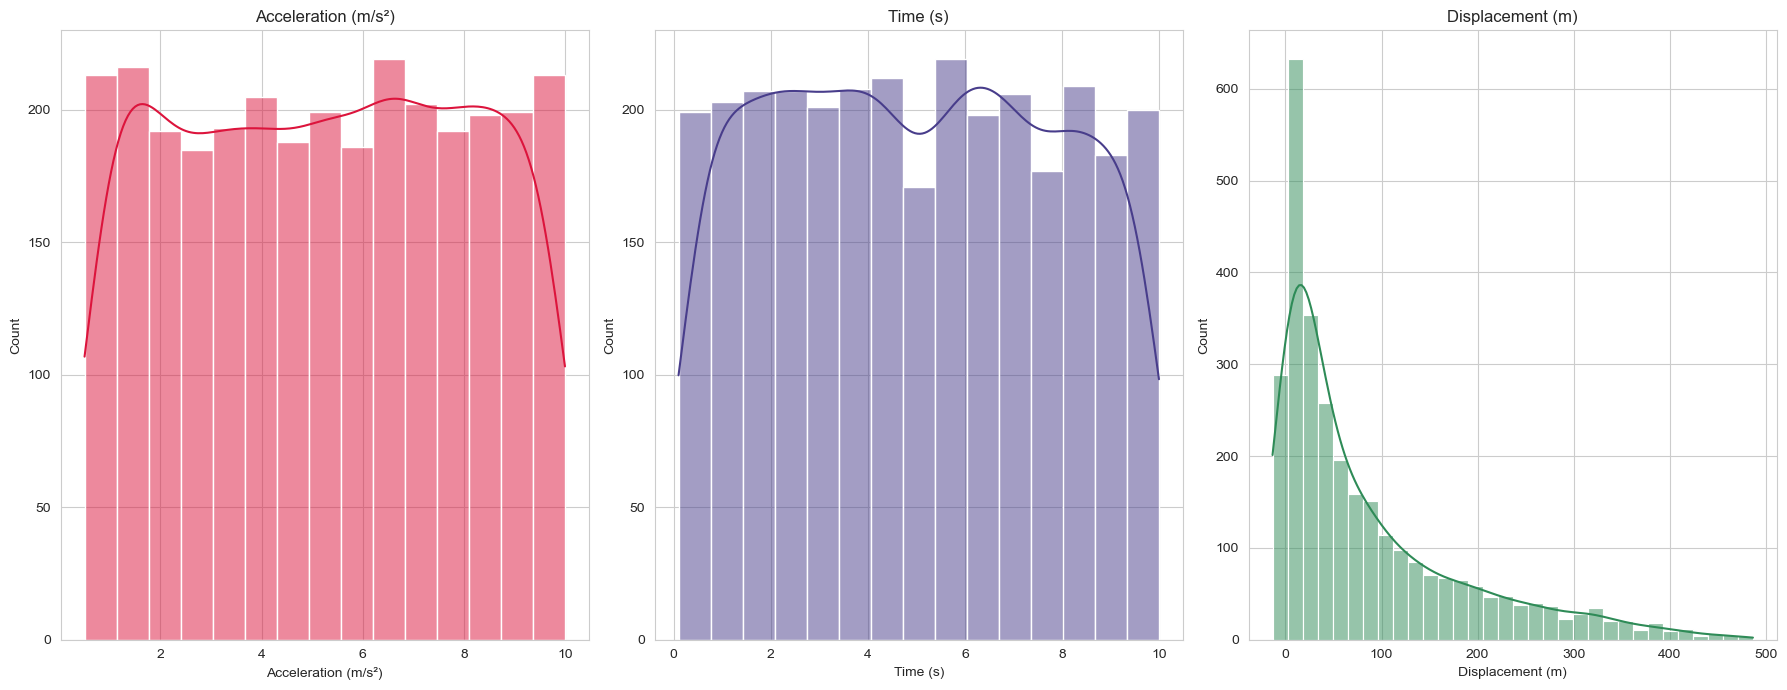

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

sns.histplot(data=df, x='Acceleration_ms2', kde=True, ax=axs[0], color='crimson')
axs[0].set_title('Acceleration (m/s²)')
axs[0].set_xlabel('Acceleration (m/s²)')
axs[0].set_ylabel('Count')

sns.histplot(data=df, x='Time_s', kde=True, ax=axs[1], color='darkslateblue')
axs[1].set_title('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Count')

sns.histplot(data=df, x='Displacement_m', kde=True, ax=axs[2], color='seagreen')
axs[2].set_title('Displacement (m)')
axs[2].set_xlabel('Displacement (m)')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

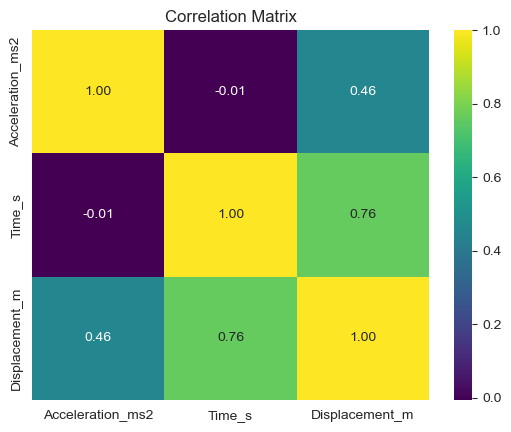

In [47]:
corr = df[['Acceleration_ms2', 'Time_s', 'Displacement_m']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()